# Regresión Ejercicio Clase 3
## Nicolás Salusso - 10710

#### 1) Se declara la variable **my_random** que contiene mi número de alumno. 

In [1]:
my_random = 14

#### 2) Iniciación del modelo:

2.1 Se declaran las variables **X** e **y** del modelo.

In [2]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

2.2 Se selecciona el feature RM(5).

In [3]:
X_feature = X[:, 5]
# Se imprime a modo de ejemplo los primeros treinta valores del feature RM
print(X_feature[0:30])

[ 6.575  6.421  7.185  6.998  7.147  6.43   6.012  6.172  5.631  6.004
  6.377  6.009  5.889  5.949  6.096  5.834  5.935  5.99   5.456  5.727
  5.57   5.965  6.142  5.813  5.924  5.599  5.813  6.047  6.495  6.674]


2.3 Se realiza el split entre los valores que van a ser de entrenamiento y de prueba.

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_feature, y, test_size=0.3, random_state=my_random)

#### 3) Se define el polinomio:

In [5]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly = PolynomialFeatures(degree=5)

3.2 Se realiza el fit al polinomio.

In [6]:
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1), y_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

3.3 Se genera el gráfico que muestra las distancias entre **$\hat{y}$** e **y**.

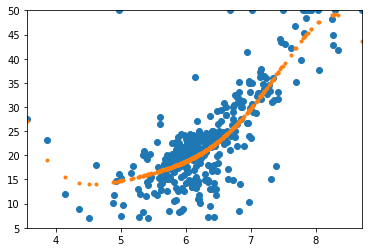

In [7]:
import matplotlib.pyplot as plt
axes = plt.subplot(111) # Establecemos límites fijos para el gráfico
axes.set_xlim(X_train.min(), X_train.max())
axes.set_ylim(y.min(), y.max())
plt.plot(X_train, y_train, 'o')
plt.plot(X_train, poly_regressor.predict(X_train_poly), '.')
plt.show()

#### 4) Entrenamiento del modelo con polinomios que van desde el grado 0 hasta el 15

In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np
y_error_entrenamiento = []
y_error_test = []
x_gradosPolinomio = []
for a in range(16):
    poly = PolynomialFeatures(degree=a)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1), y_train)
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    y_error_entrenamiento.append(mean_squared_error(y_train, poly_regressor.predict(X_train_poly)))
    y_error_test.append(mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))
    x_gradosPolinomio.append(a)

4.1 Se convierten las listas en un array de numpy para aprovechar las operaciones que ofrece esta libreria.

In [9]:
y_error_entrenamiento = np.array(y_error_entrenamiento)
y_error_test = np.array(y_error_test)
x_gradosPolinomio = np.array(x_gradosPolinomio)

4.2 Se grafica el bias-variance tradeoff para el error cuadrático medio en base a los distintos grados del polinomio.

Entrenamiento:


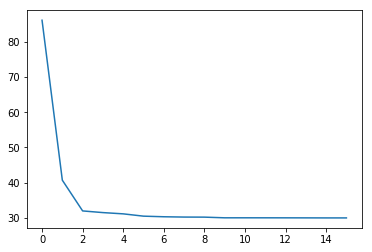

Test:


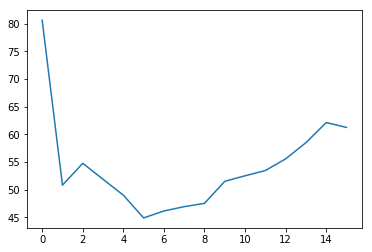

In [10]:
print('Entrenamiento:')
plt.plot(x_gradosPolinomio, y_error_entrenamiento, '-')
plt.show()
print('Test:')
plt.plot(x_gradosPolinomio, y_error_test, '-')
plt.show()

#### 5) Se especifica el grado del polinomio en el cual se minimiza el error del test.

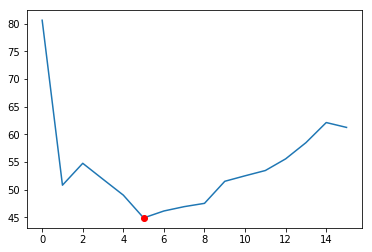

El grado del polomino en el cual se minimiza el error es: 5, dando un error de: 44.921049196036726


In [11]:
plt.plot(x_gradosPolinomio, y_error_test, '-', x_gradosPolinomio[np.argmin(y_error_test)], y_error_test.min(), 'ro')
plt.show()
print('El grado del polomino en el cual se minimiza el error es: {}, dando un error de: {}'.format(x_gradosPolinomio[np.argmin(y_error_test)], y_error_test.min()))

#### 6) Se completa el codigo del KFold para el modelo de regresión polinomial de grado 5 y se lo entrena con el feature 5.


In [12]:
# Código inicial de ejemplo para KFolds

from sklearn.model_selection import KFold

kf = KFold(n_splits=10, shuffle=True, random_state=my_random)

test_error_poly = []

# El siguiente for nos abstrae de tener que manejar explícitamente los subíndices de los folds
for train_index, test_index in kf.split(X):
    X_train, X_test = X_feature[train_index], X_feature[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    poly = PolynomialFeatures(degree=5)
    X_train_poly = poly.fit_transform(X_train.reshape(-1, 1), y_train)
    
    poly_regressor = LinearRegression()
    poly_regressor.fit(X_train_poly, y_train)
    X_test_poly = poly.transform(X_test.reshape(-1, 1))
    test_error_poly.append(mean_squared_error(y_test, poly_regressor.predict(X_test_poly)))

6.1 Se calcula el Error Cuadrático Medio promedio entre los 10 folds.

In [13]:
np.average(test_error_poly)

36.09370980105556

#### Fin